This notebook shows how to load the 2016HBXX beatbox dataset. It is comprised of 341 audio recordings. The beatboxer was asked to produce a variety of kick, hi-hat, snare, rimshot and cymbal effects. 

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# load dataset: 13 *averaged* MFCC without pre-proc
df = pd.read_csv('2016HBXX_effets_mfcc_nodeltas_XY_nozcaPerFile_nozcaX.csv', )

In [6]:
# print header
df.head()

,effect,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12
0,cymbale_expiree,12.9386,-1.311020,-0.538907,-0.378916,-0.471464,-0.227610,-0.486994,-0.462501,-0.505221,-0.158843,-0.061992,-0.092957,-0.029067
1,cymbale_expiree,13.5172,-1.054040,-0.746834,-0.415100,-0.451971,-0.247730,-0.484020,-0.480398,-0.525539,-0.193924,-0.076974,-0.062771,-0.026052
2,cymbale_expiree,12.6682,-1.128110,-0.612262,-0.467454,-0.399801,-0.141812,-0.470429,-0.508617,-0.506058,-0.183248,-0.047863,-0.049629,-0.028216
3,cymbale_expiree,12.7852,-0.989419,-0.711028,-0.514865,-0.389289,-0.168611,-0.447980,-0.537689,-0.545465,-0.216320,-0.060749,-0.046150,-0.026503
4,cymbale_expiree,12.7532,-1.302820,-0.624149,-0.468124,-0.329432,-0.243137,-0.528055,-0.416591,-0.465313,-0.164294,-0.050213,-0.053351,-0.038092


In [7]:
# print counts
df.effect.value_counts()

kick_power             42
rimshot_power          38
kick_humming           37
hihat_humming          37
snare_humming          30
cymbale_expiree        28
rimshot_humming        25
hihat_power ouvert     24
snare_power            22
snare_power inverse    20
hihat_power ferme      20
cymbale_inspiree       18
Name: effect, dtype: int64

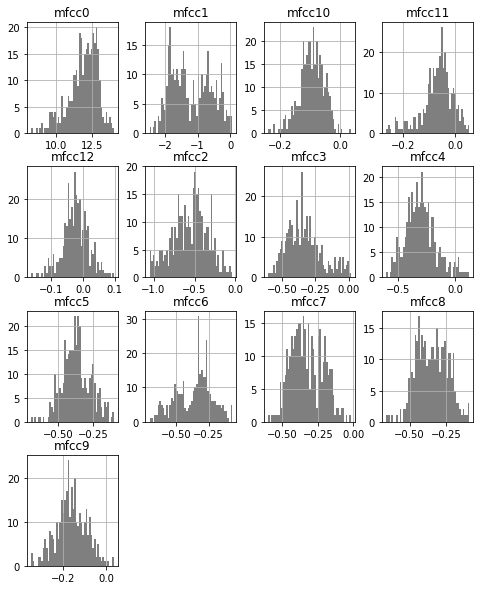

In [10]:
# feature histograms
df.ix[:, 1:].hist(color='k', alpha=0.5, bins=50, figsize=(8, 10))
plt.show()

In [11]:
# numpy arrays and dictionaries
removeC0=True

X = df.ix[:, 1:].values
if removeC0:
    X = X[:, 1:]
    
Y_str = df.ix[:, 0].values

set_effets = np.unique(Y_str)
print(set_effets)

effet2int = {}
int2effet = {}
for k, el in enumerate(set_effets):
    effet2int[el] = k
    int2effet[k] = el

Y = []
for _, y in enumerate(Y_str):
    Y.append(effet2int[y])
Y = np.asarray(Y, dtype=np.int32)

# print(Y)
print (X.shape, Y.shape)

['cymbale_expiree' 'cymbale_inspiree' 'hihat_humming' 'hihat_power ferme'
 'hihat_power ouvert' 'kick_humming' 'kick_power' 'rimshot_humming'
 'rimshot_power' 'snare_humming' 'snare_power' 'snare_power inverse']
(341, 12) (341,)
